# (12104) Chesley orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
body_id = '12104'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
body_radius = 0.0
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)

In [4]:
add_gaia_obs = True
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias_hires = False
debias_lowres = True
deweight = True
eliminate = False
max_obs_per_night = 4
verbose = True
obs_array_optical, observer_codes_optical = fit.get_mpc_optical_obs_array(body_id, de_kernel_path, optical_obs_file, t_min_tdb, t_max_tdb, debias_hires, debias_lowres, deweight, eliminate, max_obs_per_night, verbose)
obs_array_radar, observer_codes_radar = fit.get_radar_obs_array(body_id, t_min_tdb, t_max_tdb, verbose)
if add_gaia_obs:
    obs_array_gaia, observer_codes_gaia = fit.get_gaia_optical_obs_array(body_id, de_kernel_path, t_min_tdb=None, t_max_tdb=None, verbose=True)
    obs_array_optical = np.vstack((obs_array_optical, obs_array_gaia))
    observer_codes_optical = observer_codes_optical + observer_codes_gaia

Skipped 0 observations 
	 0 of which were non-geocentric occultations, 
	 0 were either roving or radar observations (radar is handled separately), 
	 0 of which were outside the specified time range.
No debiasing needed for 1832 observations. Debiased 1301 observations. No biasing information for 10 observations.
Applied default weight of 1 arcsec to 163 CCD observations
Deweighted 804 observations as part of deweighting scheme.
Found 257 observations from gaiadr3
	 Added 32 of those observations.


In [5]:
n_iter_max = 10
fit_sim = fit.FitSimulation(init_sol, init_cov, obs_array_optical, observer_codes_optical, obs_array_radar, observer_codes_radar, n_iter_max=n_iter_max, de_kernel=de_kernel, de_kernel_path=de_kernel_path, radius=body_radius, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.427			 0.505			 1548.300			 0.244
2			 0.427			 0.503			 1549.253			 0.244
3			 0.427			 0.503			 1549.253			 0.244
Converged without rejecting outliers. Starting outlier rejection now...
4			 0.396			 0.456			 1252.918			 0.199
5			 0.396			 0.456			 1252.856			 0.199
Converged after rejecting outliers. Rejected 19 out of 3175 optical observations.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations at iteration 5 (of 5):
RMS unweighted: 0.39589159920077244
RMS weighted: 0.4558561639453853
chi-squared: 1252.8556509427606
reduced chi-squared: 0.19867676037785612
square root of reduced chi-squared: 0.44573171345312207
--------------------------------------------------------------
Solution Time: MJD 57750.00 TDB =  2016-12-28 00:00:00.000 TDB
--------------------------------------------------------------
Fitted Variable		Initial Value			Uncertainty			Fitted Value 			Uncertainty			Change				Change (sigma)
e			2.41689520000e-02		1.04607535868e-08 		2.41689578011e-02		1.01052349171e-08 		+5.80108557025e-09		+0.555
q			2.93822335383e+00		3.56216212534e-08 		2.93822334048e+00		3.43815624194e-08 		-1.33475057673e-08		-0.375
tp			5.68199205284e+04		1.13796723893e-04 		5.68199206445e+04		1.09563367870e-04 		+1.16132912808e-04		+1.021
om			7.80621881248e+01		3.59338546606e-07 		7.80621875037e+01		3.49445439271e-07 		-6.21112846488e-07		-1.728
w			1.829912

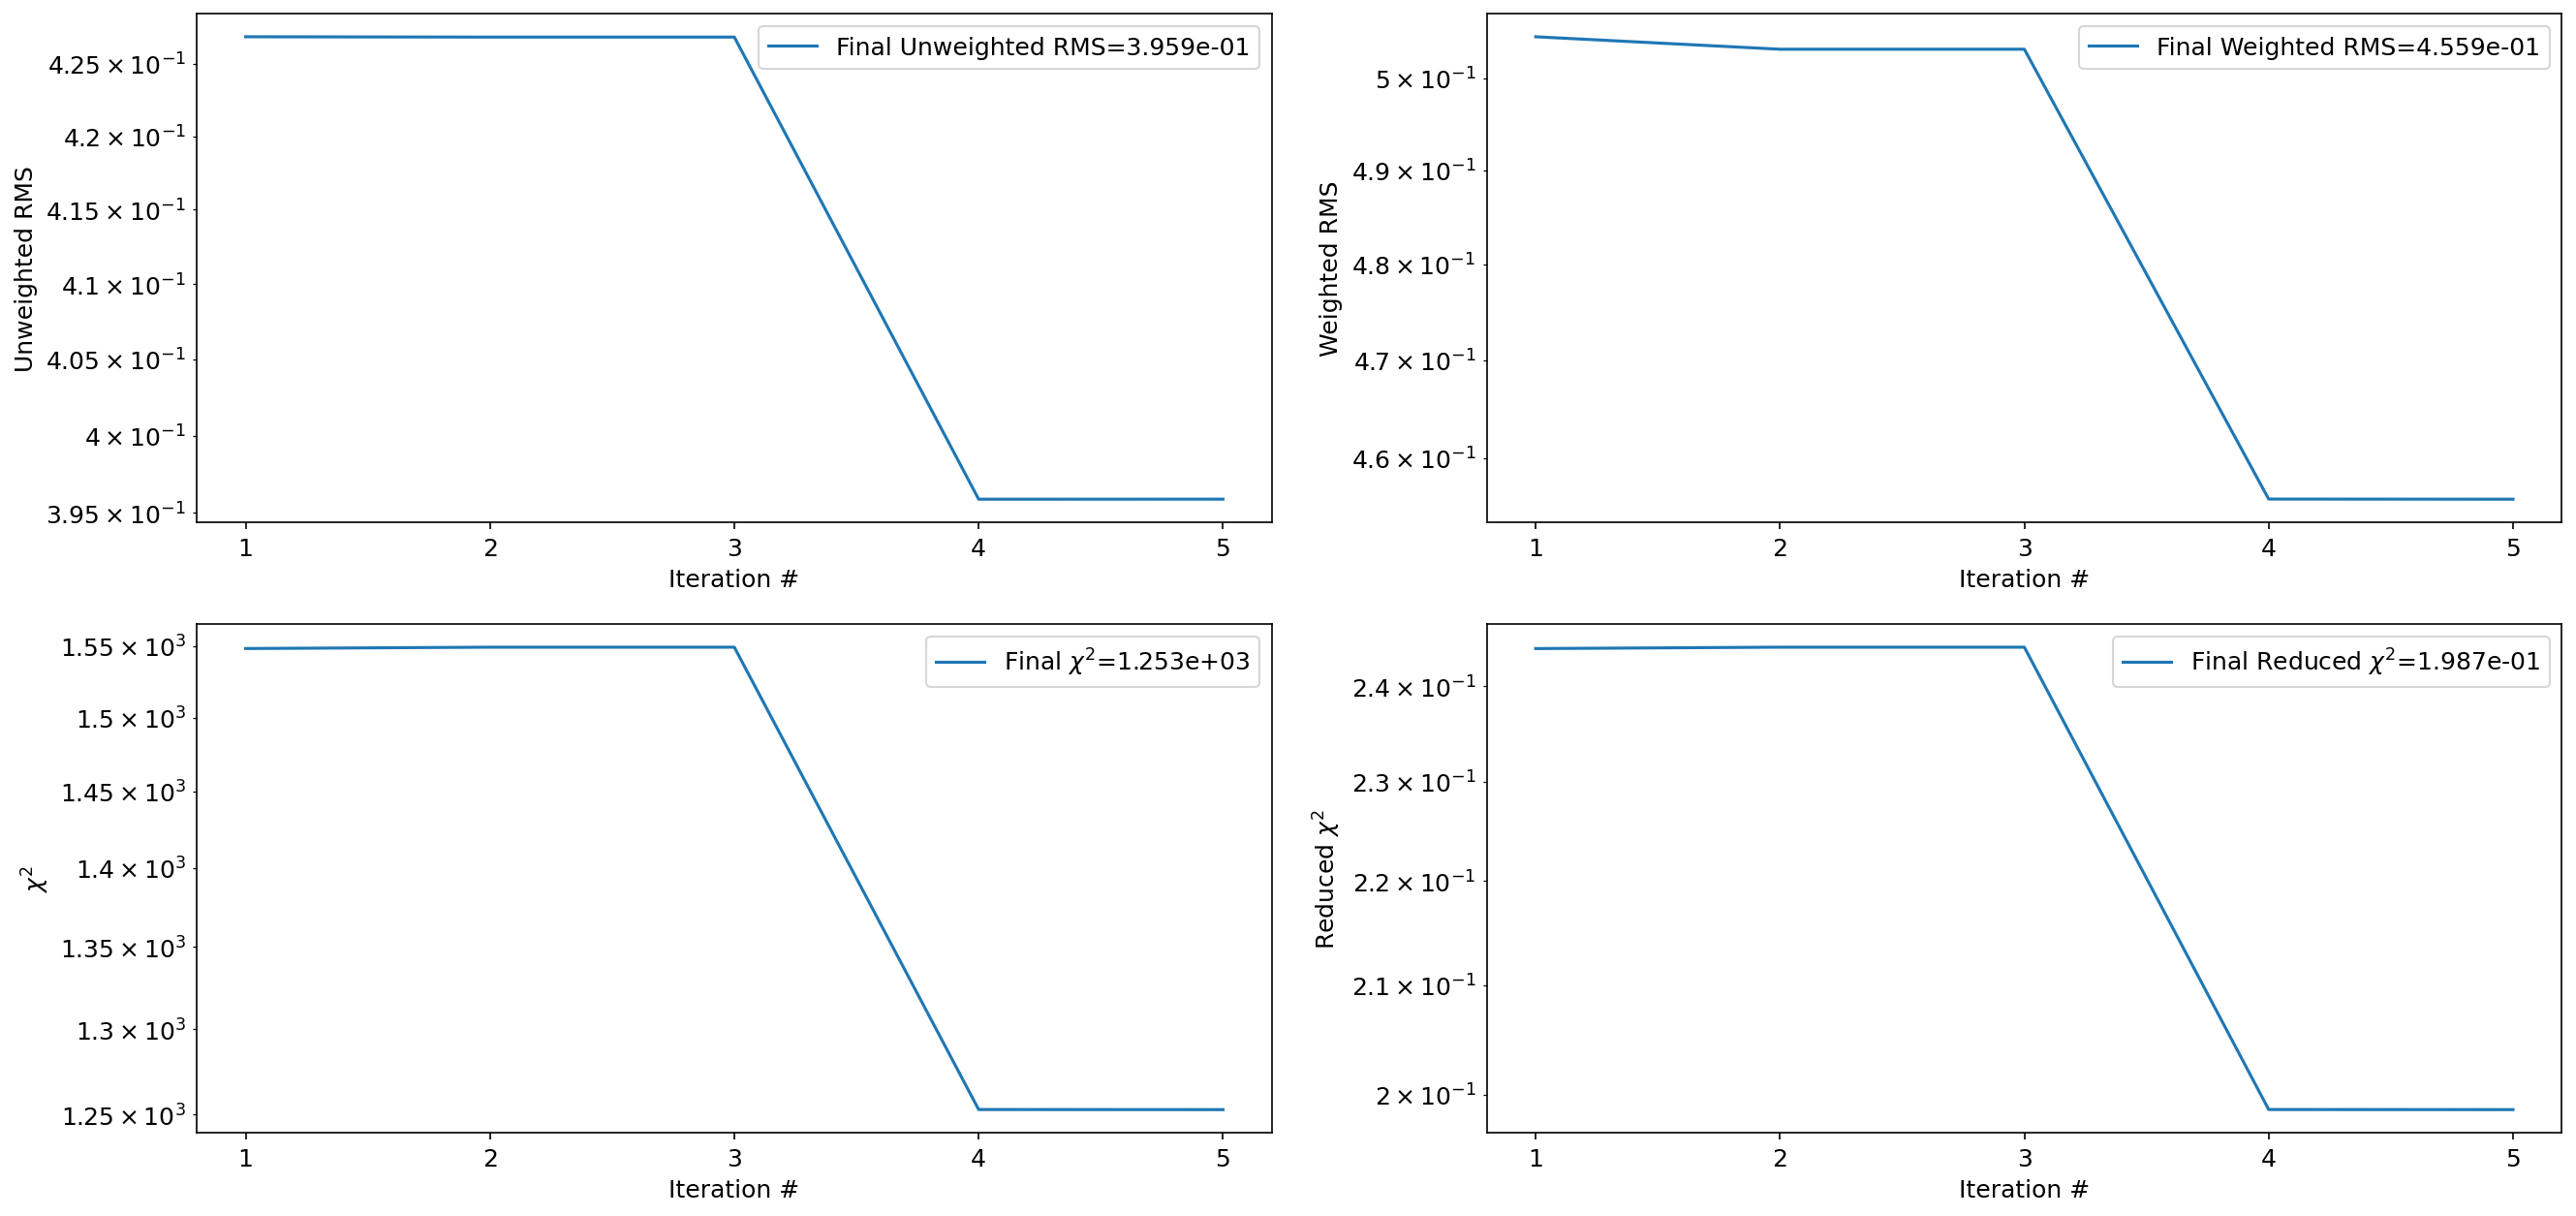

In [8]:
fit_sim.plot_summary(auto_close=True)

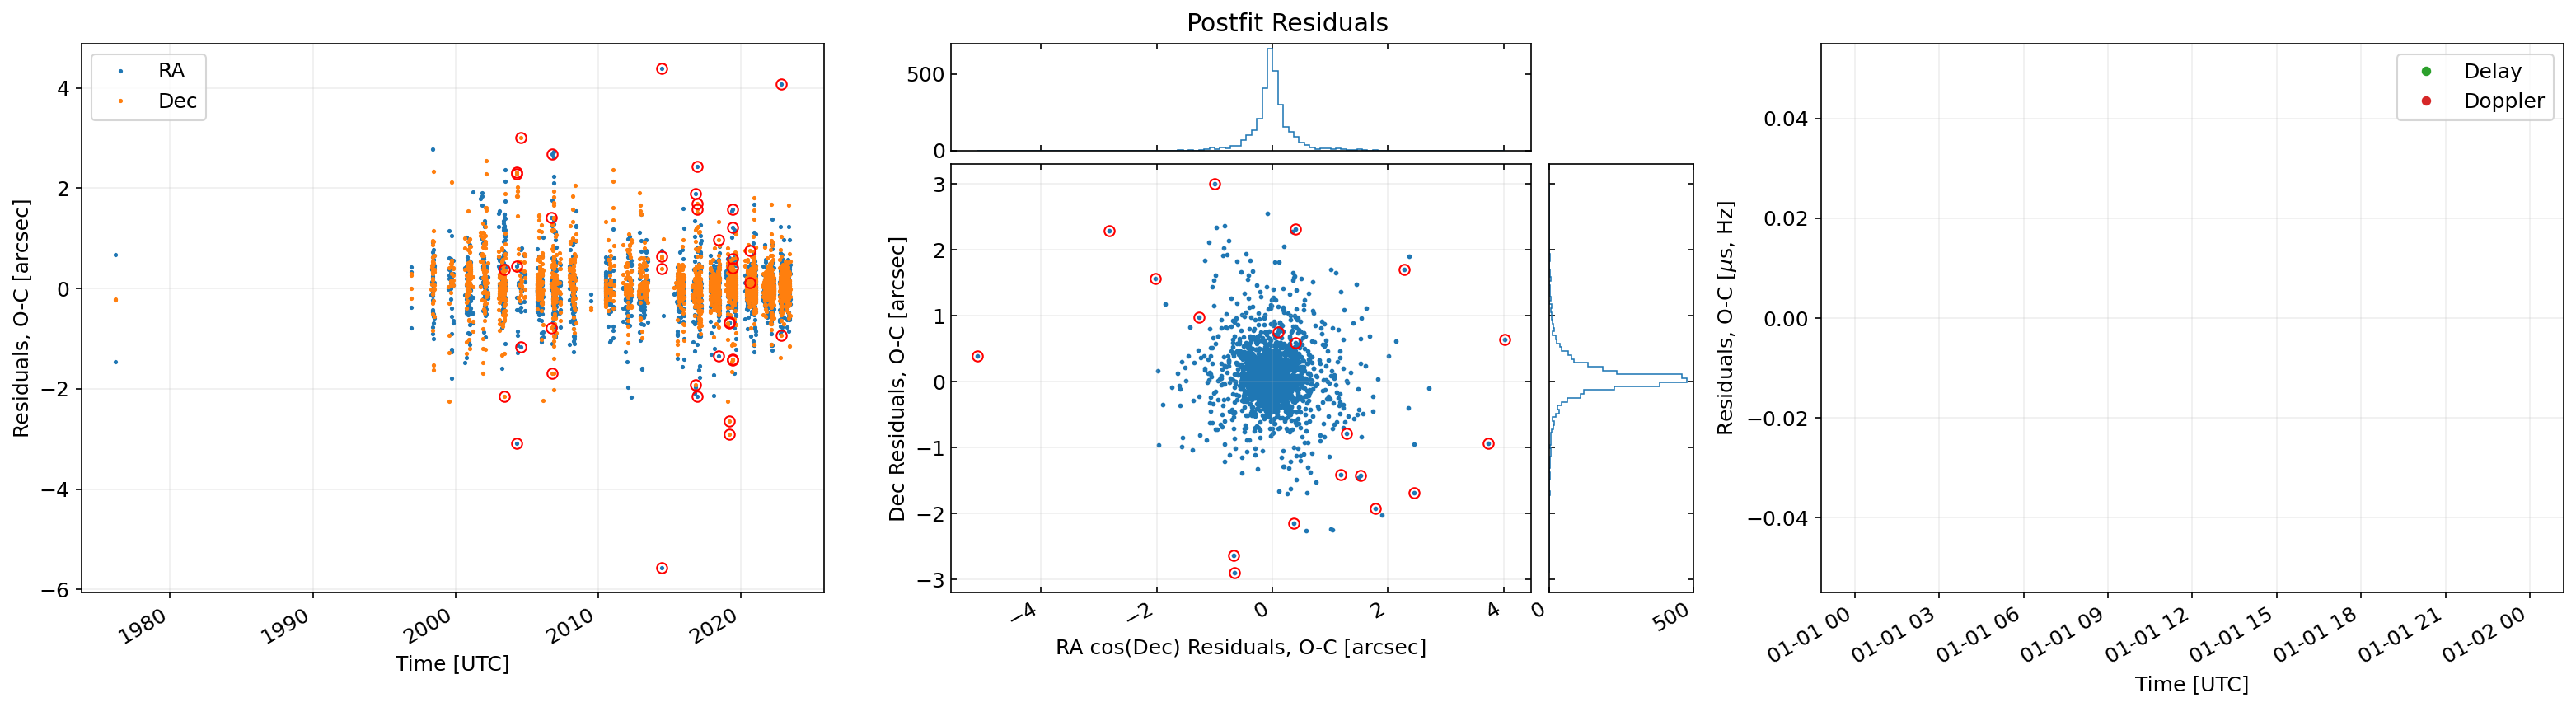

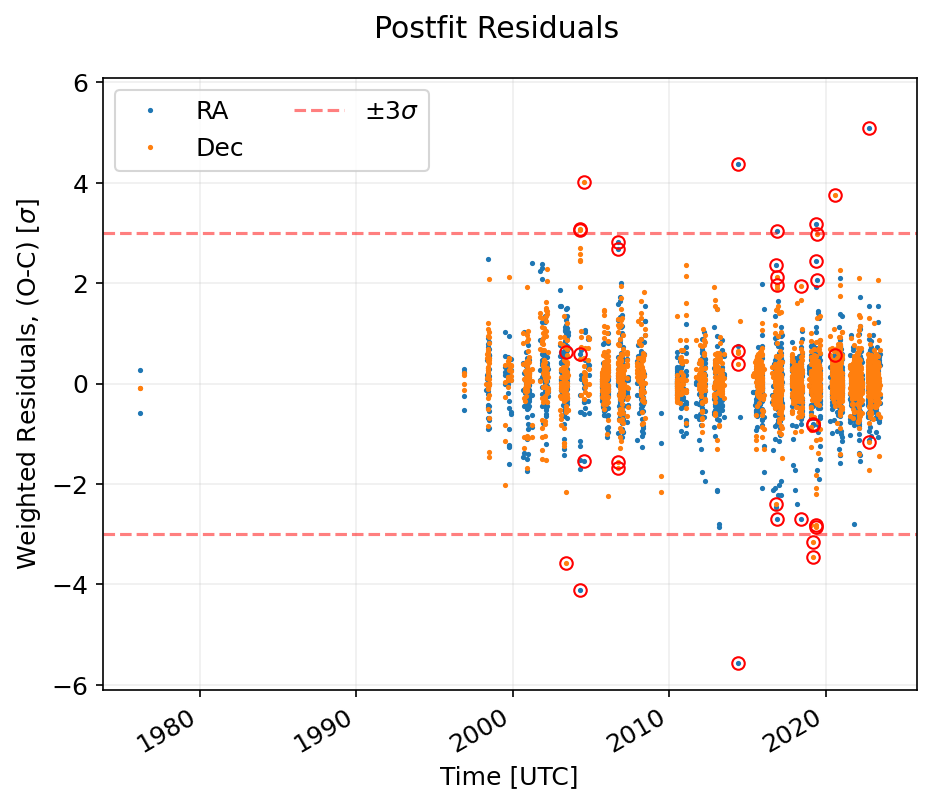

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)

In [10]:
mean_0 = np.array(list(init_sol.values())[1:])
cov_0 = init_cov
mean_f = np.array(list(fit_sim.x_nom.values()))
cov_f = fit_sim.covariance

maha_dist_f, maha_dist_0, bhattacharya, bhatt_coeff = fit.get_similarity_stats(mean_0, cov_0, mean_f, cov_f)
print(f'Mahalonobis distance between JPL and GRSS solution: {maha_dist_f:0.2f}')
print(f'Mahalonobis distance between GRSS and JPL solution: {maha_dist_0:0.2f}')
print(f'Bhattacharya distance between JPL and GRSS solution: {bhattacharya:0.4f}')
print(f'Bhattacharya coefficient between JPL and GRSS solution: {bhatt_coeff:0.4f}')

Mahalonobis distance between JPL and GRSS solution: 2.94
Mahalonobis distance between GRSS and JPL solution: 3.01
Bhattacharya distance between JPL and GRSS solution: 0.0016
Bhattacharya coefficient between JPL and GRSS solution: 0.9984


In [11]:
assert maha_dist_f < 5.0
assert maha_dist_0 < 5.0
assert bhattacharya < 0.10
assert bhatt_coeff > 0.90